## Image Compression using K-means, parallelized with pyCuda

In [14]:
# Import modules
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random

zsh:1: command not found: wget
Password:
sudo: a password is required
zsh:1: command not found: wget
Password:
sudo: a password is required
Password:

In [3]:
# Read an image from a file
fileName = input("Enter the file name: ")

In [5]:
# Load the image into an array
image = plt.imread(fileName)
print(image.shape)

(4032, 3024, 3)


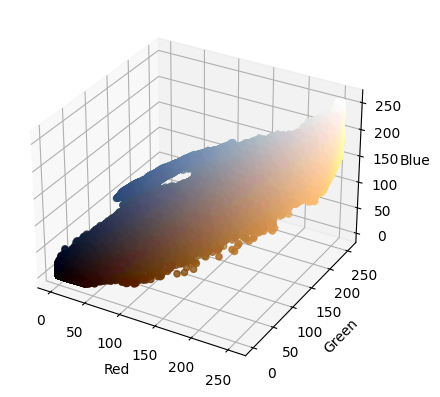

In [9]:
# Display RGB image on a 3D plot, with the x, y, and z axis representing the red, green, and blue channels respectively

# Extract R, G, B channels
R = image[:, :, 0]
G = image[:, :, 1]
B = image[:, :, 2]

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot RGB values as scatter points
ax.scatter(R.flatten(), G.flatten(), B.flatten(), c=image.reshape((-1,3))/255.0, marker='o')

# Set axis labels
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')

# Show plot
plt.show()

In [10]:
# Create a point object
class Pixel:
    def __init__(self, x, y, r, g, b):
        self.x = x  # x coordinate of the pixel in the input image
        self.y = y  # y coordinate of the pixel in the input image
        self.r = r  # red value of the pixel
        self.g = g  # green value of the pixel
        self.b = b  # blue value of the pixel

In [13]:
# Create a centroid object
class Centroid:
    def __init__(self, r, g, b):
        self.r = r  # red value of the centroid
        self.g = g  # green value of the centroid
        self.b = b  # blue value of the centroid

In [11]:
# Convert the image into a list of points
points = []
for y in range(image.shape[0]):
    for x in range(image.shape[1]):
        points.append(Pixel(x, y, R[y, x], G[y, x], B[y, x]))

# print the first 10 points
for i in range(10):
    print("Pixel", i, ":", points[i].x, points[i].y, points[i].r, points[i].g, points[i].b)

Point 0 : 0 0 69 95 130
Point 1 : 1 0 69 95 130
Point 2 : 2 0 66 92 127
Point 3 : 3 0 65 91 126
Point 4 : 4 0 68 94 129
Point 5 : 5 0 69 95 130
Point 6 : 6 0 69 95 130
Point 7 : 7 0 70 96 131
Point 8 : 8 0 68 94 129
Point 9 : 9 0 67 93 128


In [ ]:
# Cluster the image pixel color values with K-means

# Assign random centroids
centroids = []
n_centroids = input("Enter the number of centroids: ")
for i in range(n_centroids):
    # Assign a random point as the centroid
    chosen_point = random.choice(points)
    if Centroid(chosen_point.r, chosen_point.g, chosen_point.b) not in centroids:
        centroids.append(Centroid(chosen_point.r, chosen_point.g, chosen_point.b))
    else:
        print("Duplicate centroid found. Skipping.")

In [1]:
# A function to calculate the distance between a point and a centroid in three dimensions
def distance(point, centroid):
    return ((point.r - centroid.r) ** 2 + (point.g - centroid.g) ** 2 + (point.b - centroid.b) ** 2)

In [ ]:
# One-time PyCuda installs
!wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/cuda-ubuntu1804.pin
!sudo mv cuda-ubuntu1804.pin /etc/apt/preferences.d/cuda-repository-pin-600
!wget https://developer.download.nvidia.com/compute/cuda/11.2.0/local_installers/cuda-repo-ubuntu1804-11-2-local_11.2.0-460.27.04-1_amd64.deb
!sudo dpkg -i cuda-repo-ubuntu1804-11-2-local_11.2.0-460.27.04-1_amd64.deb
!sudo apt-key add /var/cuda-repo-ubuntu1804-11-2-local/7fa2af80.pub
!sudo apt-get update
!sudo apt-get -y install cuda
!pip install pycuda

In [ ]:
# Determine the best grid ad block dimensions
import pycuda.driver as cuda
import pycuda.autoinit
from pycuda.tools import DeviceData

# Create a PyCUDA context for the current device.
ctx = cuda.Device(0).make_context()

# Get the maximum threads per block for the current device.
device_data = DeviceData()
max_threads_per_block = device_data.max_threads_per_block

# Print the result.
print(f"Max threads per block: {max_threads_per_block}")

# Release the PyCUDA context.
ctx.pop()

In [ ]:
# A function to calculate the closest centroid to each point, using pyCuda
def assign(points, centroids):
    


In [ ]:
# Loop through the iterations

max_iterations = input("Enter the maximum number of iterations: ")

for i in range(max_iterations):
    # Assign each point to the closest centroid
    for point in points:
        # Calculate the distance between the point and the centroid
        # Assign the point to the closest centroid
        # Update the cluster assignment of the point
        pass

    # Update the centroids
    for centroid in centroids:
        # Calculate the mean of the points assigned to the centroid
        # Update the centroid to the mean of the points assigned to it
        pass


In [ ]:
# Display the clustered image on a 3D plot

In [ ]:
# Display the final image